In [42]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.animation import PillowWriter

$$ \exp\left( - \frac{(x-x_0)^2}{2\sigma^2}\right) \exp\left(ik_0x\right)
$$

In [2]:
t = np.linspace(0.,2500,1000)
L = 750
N_grid = 750 
a = 420
V0 = 0.1
w = 50
x0 = 100
k0 = 0.4
sigma = 15

In [3]:
x = np.linspace(0,L,N_grid+1)

In [7]:
x[:10]

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [8]:
dx = x[1]-x[0]

In [9]:
def integral(f, dx, axis = 0):
    """This function allows us to approximate integrals in discrete space"""
    return np.sum(f*dx, axis = axis)

In [16]:
Psi0  = np.exp( -1/2* (x[1:-1]-x0)**2/sigma**2) *np.exp(1j*k0*x[1:-1]) 

In [17]:
#normalise the initial state
norm  = integral(np.abs(Psi0)**2, dx)
Psi0 = Psi0/np.sqrt(norm)

In [19]:
#kinetic energy
T = -1/2 * 1/dx**2 * (np.diag(-2*np.ones(N_grid-1))+ np.diag(np.ones(N_grid-2),1)+ np.diag(np.ones(N_grid-2),-1))
print(T.shape)

(749, 749)


In [21]:
#potential as a flat array
V_flat = np.array([V0 if a< pos < a+w else -0.01 for pos in x[1:-1]])

In [26]:
V_flat[:10]

array([-0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01, -0.01,
       -0.01])

In [27]:
#potential energy as a diagonal matrix
V = np.diag(V_flat)

#Hamiltonian
H = T+V

In [29]:
V.shape

(749, 749)

In [30]:
#get eigenvalues and eigenvectors and normalise
E, psi = np.linalg.eigh(H)
psi = psi.T
norm = integral(np.abs(psi)**2, dx)
psi = psi/np.sqrt(norm)

In [31]:
#get expansion coeffs
c_n = np.zeros_like(psi[0], dtype=complex)
for j in range(0, N_grid-1):

    c_n[j] = integral(np.conj(psi[j]) * Psi0, dx) #for each eigenvector, compute the inner product

In [33]:
c_n.shape

(749,)

In [34]:
#get a function that returns the time dependent wavefunction
def Psi(t):
    
    return psi.T@(c_n*np.exp(-1j*E*t))

In [37]:
yreal = []
yimg = []
for i in t:
    yreal.append(np.real(Psi(i)))
    yimg.append(np.imag(Psi(i)))

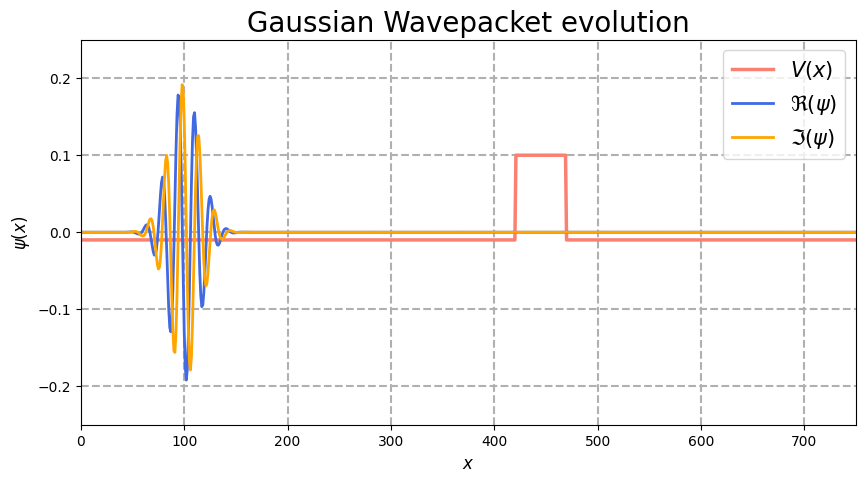

In [75]:
fig, ax = plt.subplots(figsize = (10,5))

def animate(i):   
    ax.clear()
        
    ax.plot(x[1:-1],V_flat, color="salmon", lw=2.5, label = '$V(x)$')
    ax.set_title('Gaussian Wavepacket evolution', fontsize = 20)
    ax.plot(x[1:-1],yreal[i],lw=2,color="royalblue", label = '$\Re(\psi)$')
    ax.plot(x[1:-1],yimg[i],lw=2,color="orange", label = '$\Im(\psi)$')
    ax.legend(fontsize = 15)
    ax.set_xlabel('$x$', fontsize = 12)
    ax.set_ylabel(r'$\psi(x)$', fontsize=12)
    ax.set_xlim([0,L])
    ax.set_ylim([-0.25, 0.25])
    ax.grid(ls="--", lw=1.5)

ani = FuncAnimation(fig, animate, frames=500, interval=10)
ani.save('tunneling.gif',writer='pillow',fps=50,dpi=100)